In [5]:
import torch
import torchaudio
import matplotlib.pyplot as plt

In [ ]:
filename='/home/akashnagaraj/Desktop/DEEP-LEARNING/Torch/supreme-torch/data/song.mp3'
waveform,sample_rate=torchaudio.load(filename)

print('Shape of waveform:{}'.format(waveform.size()))
print('Sample rate:{}'.format(sample_rate))
print(type(sample_rate))
plt.figure()
plt.plot(waveform.t().numpy())

Shape of waveform:torch.Size([2, 11612160])
Sample rate:44100
<class 'int'>


Shape of spectogram:torch.Size([2, 201, 58061])


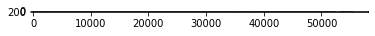

In [12]:
specgram=torchaudio.transforms.Spectrogram()(waveform)

print('Shape of spectogram:{}'.format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(),cmap='gray')

In [13]:
new_sample_rate=sample_rate/10

channel=0
transformed=torchaudio.transforms.Resample(sample_rate,new_sample_rate)
(waveform[channel,:].view(1,-1))

print('Shape of transformed waveform:{}'.format(new_sample_rate.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

AttributeError: 'float' object has no attribute 'size'